## Observations and Insights 

- Capomilin and Ramicane were tested on the most mice. It could suggest a bias, but it's unknown if it's commercial, political or other, or based on previous results
- The data wasn't clean from the start, potentially indicating other datasets used in other research may also not have been clean 
- Infubinol had an outlier which required investigation



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results)


# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count_merged = merged_df["Mouse ID"].count()
print(f"The total number of mice is {mice_count_merged}")


The total number of mice is 1893


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()[0]
print(f"{duplicates} is the duplicate mouse ID.")


g989 is the duplicate mouse ID.


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicates_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = merged_df.drop(merged_df[merged_df["Mouse ID"] == "g989"].index)
clean_merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_merged_df["Mouse ID"].unique())
print(f"The total number of mice is {mice_count}")


The total number of mice is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_mean = clean_merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_median = clean_merged_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_std_dev = clean_merged_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_var = clean_merged_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_sem = clean_merged_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Generate summary statistics table
clean_merged_summary_statistics_df = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_var, "Standard Deviation": regimen_std_dev, "SEM": regimen_sem})

# Display
clean_merged_summary_statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimen_summary_df = clean_merged_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
regimen_summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

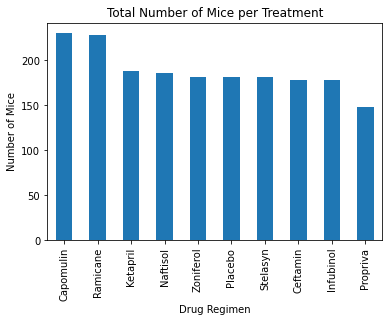

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_total = clean_merged_df["Drug Regimen"].value_counts()

mice_chart = mice_total.plot(kind="bar", title="Total Number of Mice per Treatment", ylabel="Number of Mice", xlabel="Drug Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

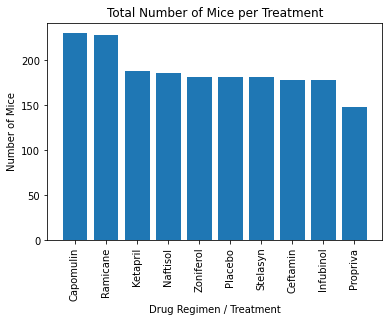

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_total.index.values, mice_total.values)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen / Treatment")
plt.ylabel("Number of Mice")
plt.xticks(rotation = 90)


(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

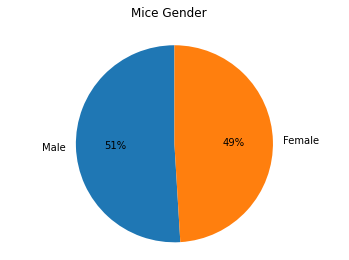

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_merged_df["Sex"].value_counts()

mice_gender_pie = mice_gender.plot(kind="pie", y=mice_gender, subplots=True, startangle=90, autopct='%1.0f%%', title="Mice Gender", ylabel="")
plt.axis("equal")


(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

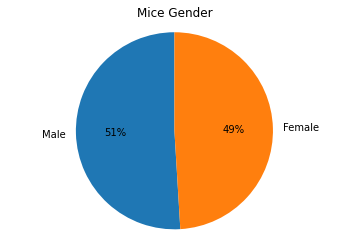

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender.plot.pie(y='Sex',startangle=90,autopct="%1.0f%%", title="Mice Gender", ylabel="")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mice_timepoint = clean_merged_df.groupby("Mouse ID").max()["Timepoint"]
mice_timepoint = mice_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
main_timepoint_merged_df = mice_timepoint.merge(clean_merged_df, how="left", on=["Mouse ID", "Timepoint"])
main_timepoint_merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = main_timepoint_merged_df.loc[main_timepoint_merged_df["Drug Regimen"] == name, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    Q1 = quartiles[.25]
    Q3 = quartiles[.75]

    IQR = Q3 - Q1

    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # print(f"{tumor_volume_list}")
    if outliers.empty == False:
        print(f"For {name} the potential outliers are outside of the lower and higher numbers of: {outliers}.")
    else:
        print(f"For {name} there are no outliers")

For Capomulin there are no outliers
For Ramicane there are no outliers
For Infubinol the potential outliers are outside of the lower and higher numbers of: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
For Ceftamin there are no outliers


Text(0.5, 1.0, 'Box Plot: Tumor Volume')

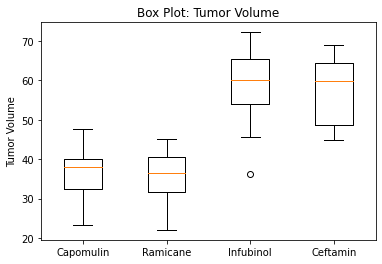

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels=treatments_list)
plt.ylabel("Tumor Volume")
plt.title("Box Plot: Tumor Volume")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

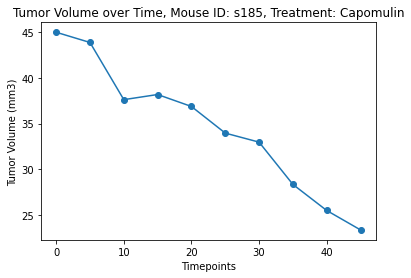

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_capomulin = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Capomulin"]

mice_capomulin_single = mice_capomulin.loc[mice_capomulin['Mouse ID'] == "s185"]

plt.plot(mice_capomulin_single["Timepoint"], mice_capomulin_single["Tumor Volume (mm3)"], marker='o')
plt.title("Tumor Volume over Time, Mouse ID: s185, Treatment: Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

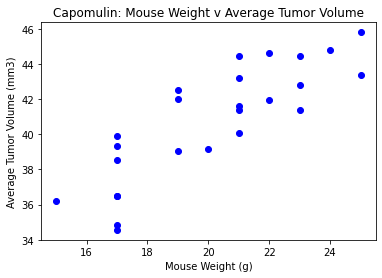

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_capomulin_mean = mice_capomulin.groupby("Mouse ID").mean()

mice_capumolin_weight_mean = mice_capomulin_mean["Weight (g)"]
mice_capumolin_tumor_mean = mice_capomulin_mean["Tumor Volume (mm3)"]

plt.scatter(mice_capumolin_weight_mean, mice_capumolin_tumor_mean, facecolors="blue")
plt.title("Capomulin: Mouse Weight v Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# plt.xlim(14,26)
# plt.ylim(32,48)



## Correlation and Regression

Correlation coefficient: 0.84


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

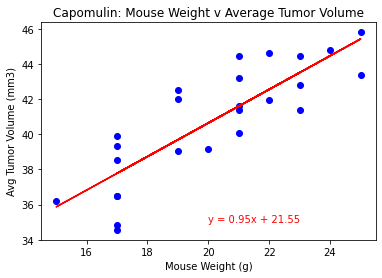

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_corr = round(st.pearsonr(mice_capumolin_weight_mean, mice_capumolin_tumor_mean)[0],2)
print(f"Correlation coefficient: {Capomulin_corr}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(mice_capumolin_weight_mean, mice_capumolin_tumor_mean)

Capomulin_linreg = slope * mice_capumolin_weight_mean + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mice_capumolin_weight_mean, mice_capumolin_tumor_mean, facecolors = "blue")
plt.plot(mice_capumolin_weight_mean,Capomulin_linreg, "r-")
plt.annotate(line_eq, (20,35), color = "red")
plt.title("Capomulin: Mouse Weight v Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")